In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt


In [ ]:
file = pd.read_csv("Pima-Diabetes-India.csv")
file.head()


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
file.shape

(768, 9)

In [ ]:
#we wish to check if a person has diabetes or not, i.e our target variable is clas, i.e a binary class
file.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

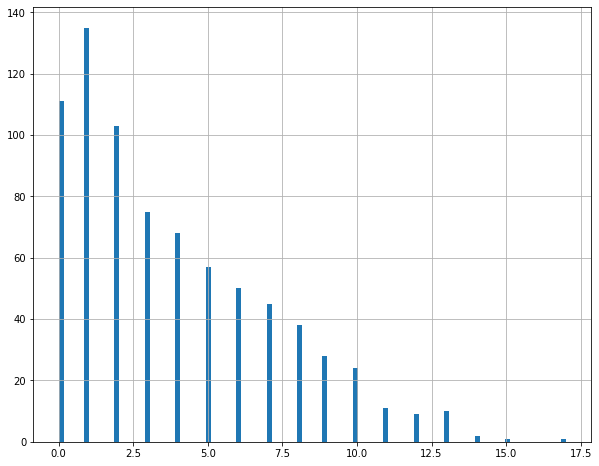

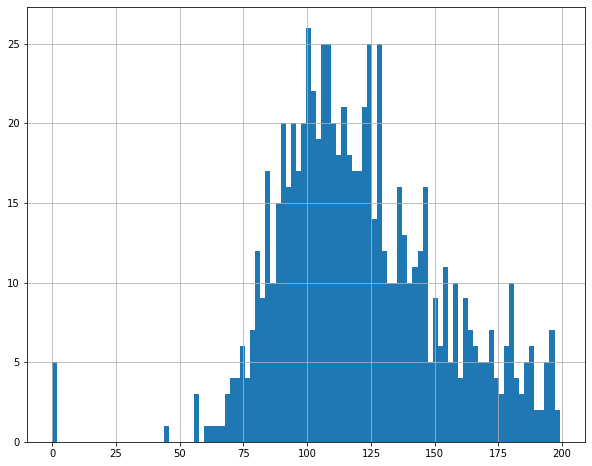

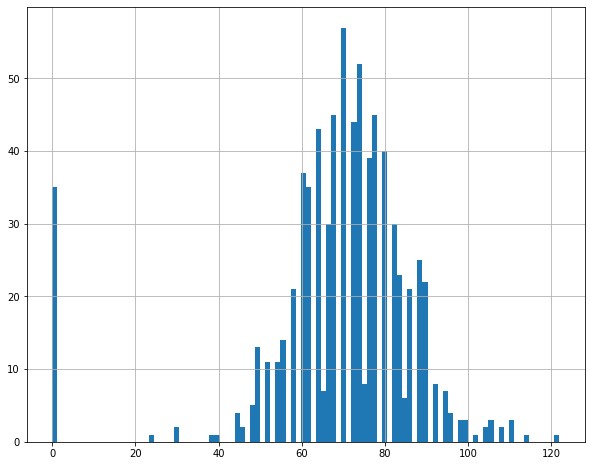

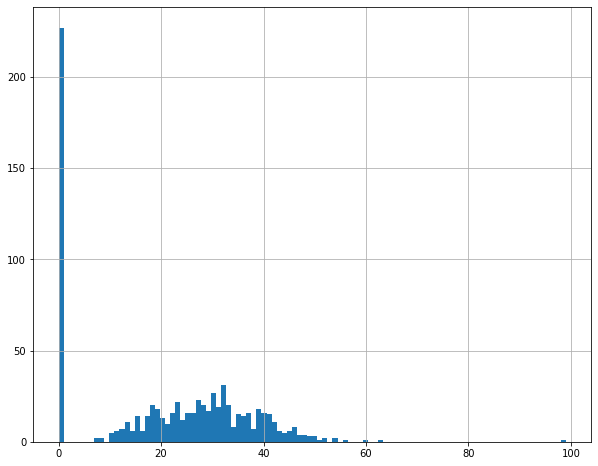

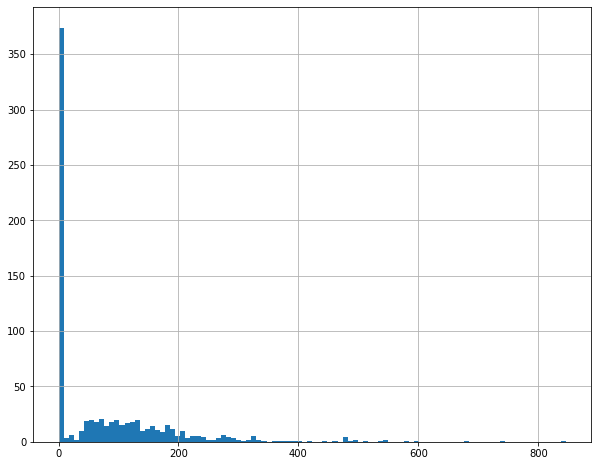

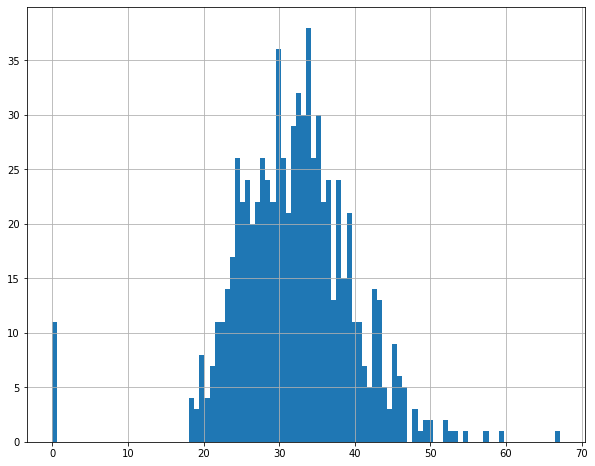

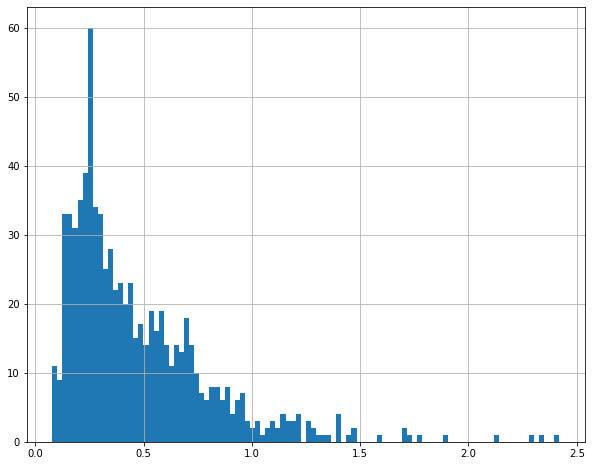

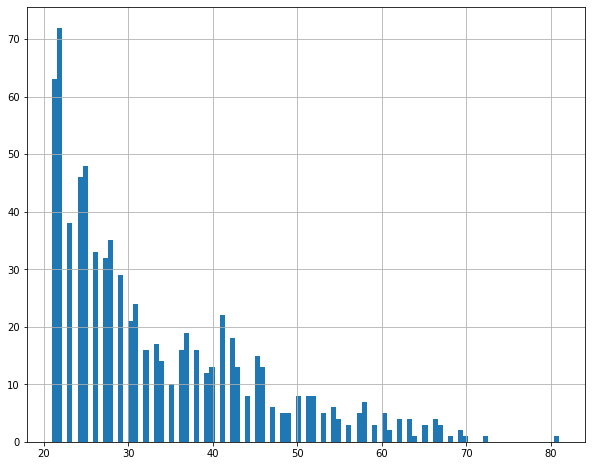

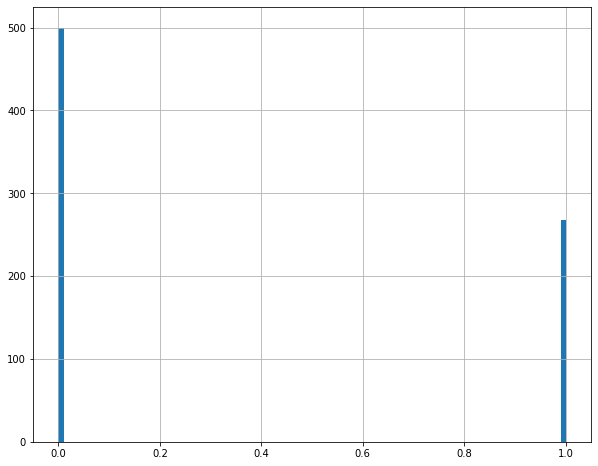

In [ ]:
#even if there are no null values, there are some hidden null values, which are given as o
for i in file.columns:
  file[i].hist(bins = 100, figsize = (10,8))
  plt.show()

In [ ]:
#plot heatmap
cor = file.corr()

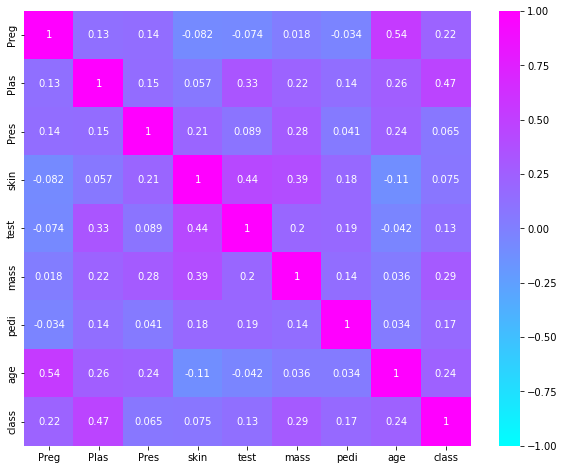

In [ ]:
plt.figure(figsize=(10,8))
sb.heatmap(cor,vmin = -1, vmax = 1, annot = True, cmap = "cool")

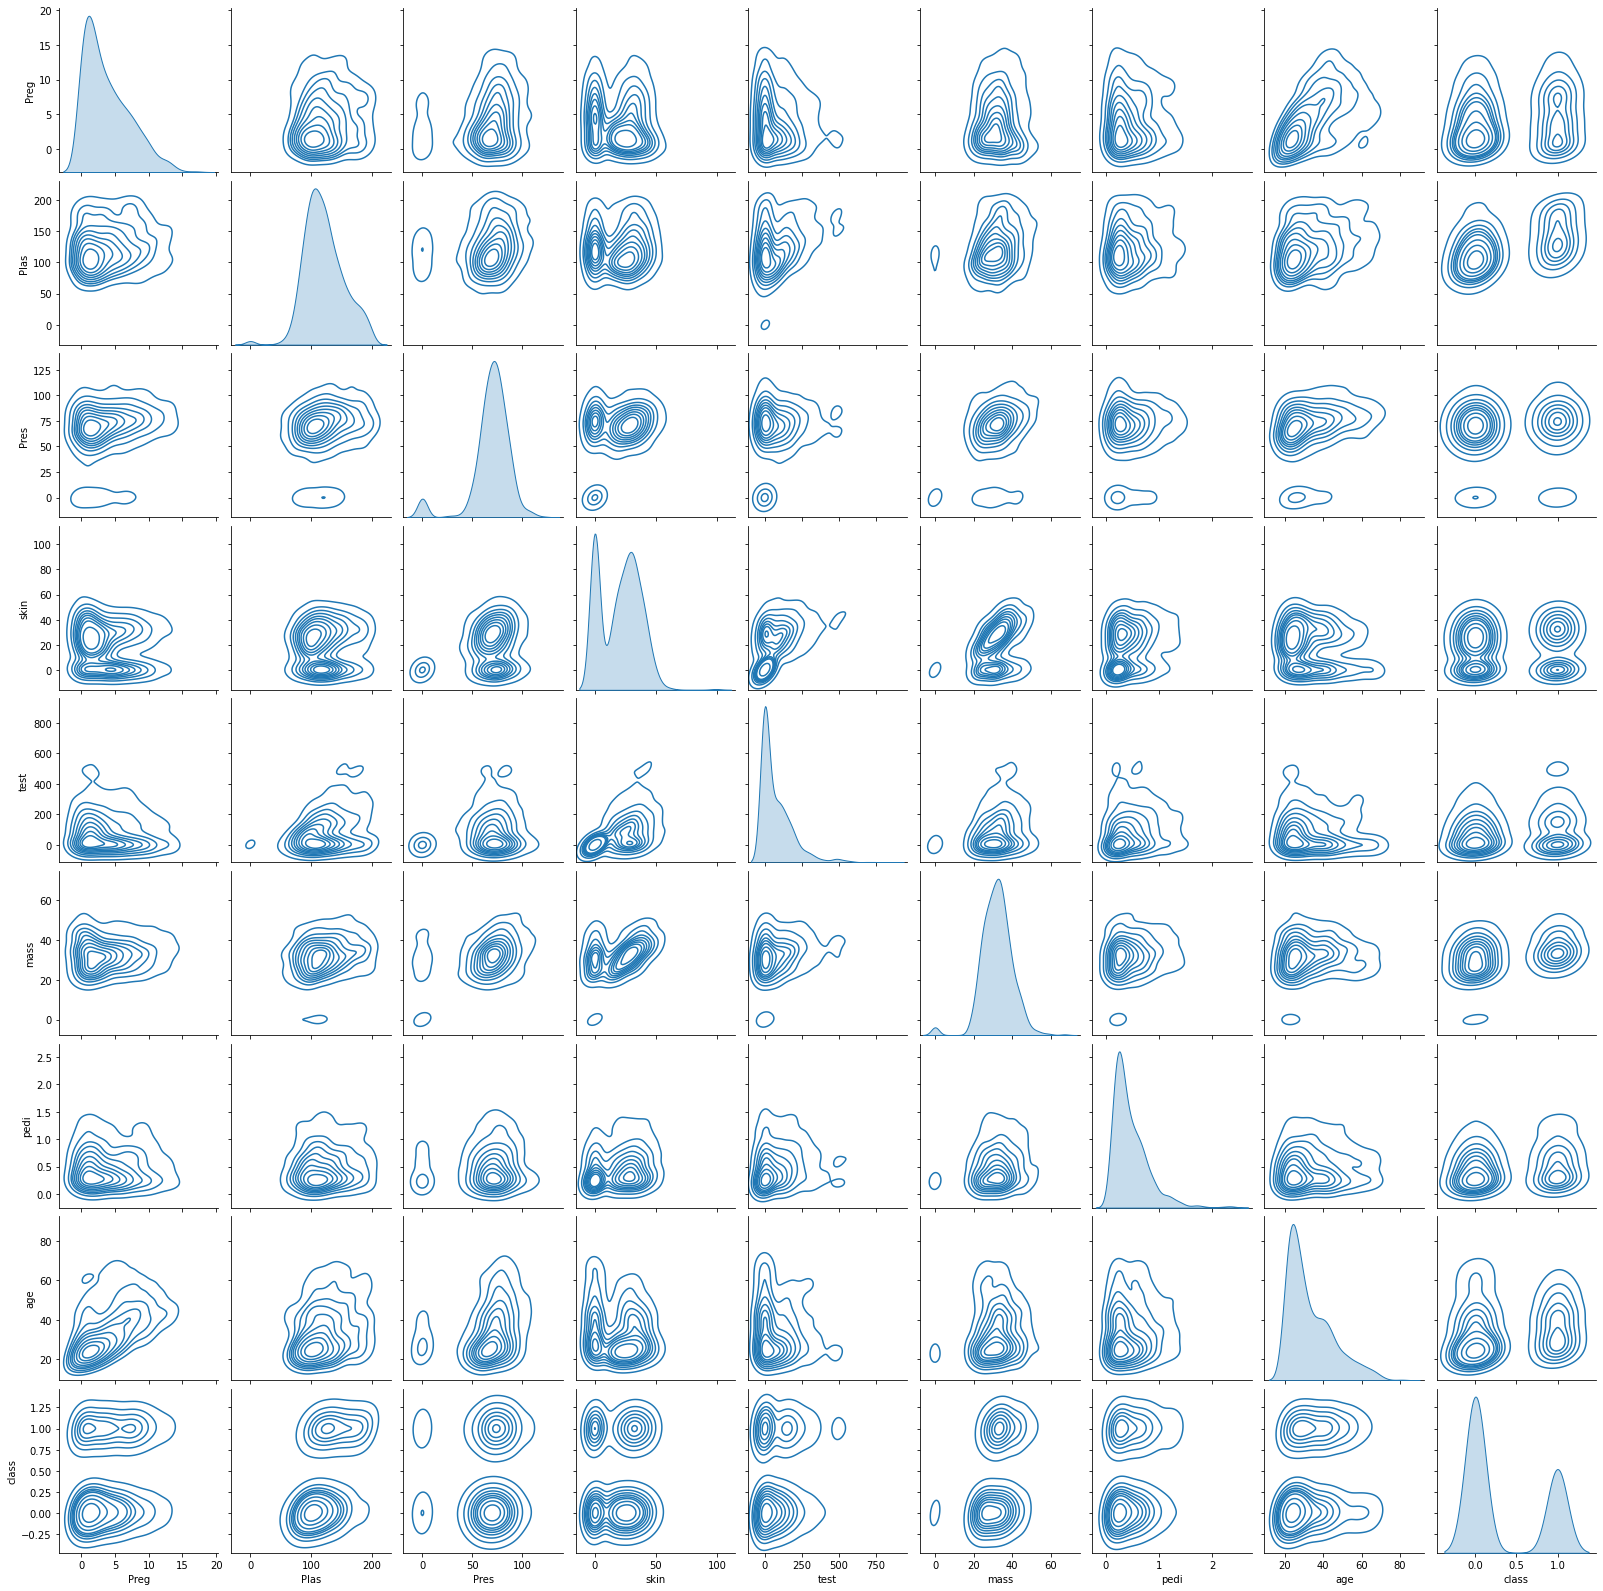

In [ ]:
sb.pairplot(file, kind = ("kde"))

In [ ]:
#to check if data set is balanced, i.e how many clas are representing False , and how many are representing True Class
file["class"].value_counts()/len(file)*100

0    65.104167
1    34.895833
Name: class, dtype: float64

In [ ]:
#going for model building
from sklearn.model_selection import train_test_split

#diving between target and independent variable
X = file.drop("class", axis = 1)
Y = file["class"]
#we specify random_state to ensure that if someone else performs the model building same random variables are sleected
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=2)

In [ ]:
X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
501,3,84,72,32,0,37.2,0.267,28
371,0,118,64,23,89,0.0,1.731,21
634,10,92,62,0,0,25.9,0.167,31
221,2,158,90,0,0,31.6,0.805,66
12,10,139,80,0,0,27.1,1.441,57


In [ ]:
#checking %
len(X_train)/len(file)*100

69.921875

In [ ]:
len(X_test)/len(file)*100

30.078125

In [ ]:
#checking for training and test set value of true and false
Y_train.value_counts()

0    345
1    192
Name: class, dtype: int64

In [ ]:
Y_test.value_counts()

0    155
1     76
Name: class, dtype: int64

In [ ]:
#treating 0 or missing values
for i in X_train.columns:
  X_train[i]= X_train[i].replace({0:X_train[i].mean()})


In [ ]:
X_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
501,3.000000,84.0,72.0,32.000000,85.452514,37.200000,0.267,28
371,3.979516,118.0,64.0,23.000000,89.000000,31.878585,1.731,21
634,10.000000,92.0,62.0,20.368715,85.452514,25.900000,0.167,31
221,2.000000,158.0,90.0,20.368715,85.452514,31.600000,0.805,66
12,10.000000,139.0,80.0,20.368715,85.452514,27.100000,1.441,57


In [ ]:
for i in X_test.columns:
  X_test[i]= X_test[i].replace({0:X_test[i].mean()})

In [ ]:
X_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
158,2.000000,88.0,74.0,19.000000,53.000000,29.0,0.229,22
251,2.000000,129.0,84.0,20.926407,66.658009,28.0,0.284,27
631,3.532468,102.0,78.0,40.000000,90.000000,34.5,0.238,24
757,3.532468,123.0,72.0,20.926407,66.658009,36.3,0.258,52
689,1.000000,144.0,82.0,46.000000,180.000000,46.1,0.335,46


In [ ]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#we use liblinear as we are using small data set, liblinear is best solver parameter for small parameter, for largeb sample no need t specify the solver parameter
#default parameter : lbfgs
#if no of feautures and no of samples is large we use sag solver
model = LogisticRegression(solver = "liblinear")
model.fit(X_train, Y_train)

y_predict = model.predict(X_test)

#variables which have least coefficient are least important, hence we can drop if value is very less
coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_

In [ ]:
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.193848  0.031531 -0.035888 -0.002687 -0.001312  0.063694  0.661704   

          7  intercept  
0 -0.001029  -4.934598  


In [ ]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
#checking model performance score by imputing accuracy score , recall score, fiscore, precission score
# for all accuracy scores 100% is best
#if recall score is less, it means that False Negative is high
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
model_score = model.score(X_test, Y_test)
print("Performance of the model built using Imbalanced data")
print("Model_score",model_score)
y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-Score: ", f1)

Performance of the model built using Imbalanced data
Model_score 0.7489177489177489
Accuracy:  0.7489177489177489
Recall:  0.4868421052631579
Precision:  0.6607142857142857
F1-Score:  0.5606060606060607


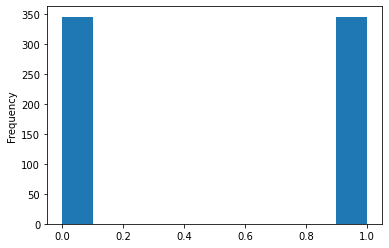

In [ ]:
#balancing training set
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8)
x_trainOS, y_trainOS  = sm.fit_resample(X_train,Y_train)
#using this transform function will create radom set variables and balance both the data sets
#plotting a graph to check
y_trainOS.plot(kind = "hist") # hence values are same

In [ ]:
#check the accuracy for after balancing
bmodel = LogisticRegression(solver="liblinear")
bmodel.fit(x_trainOS, y_trainOS)
model_score = bmodel.score(X_test, Y_test)
print("Performance of the model built using balanced data")
print("Model_score",model_score)
y_pred=bmodel.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-Score: ", f1)

Performance of the model built using balanced data
Model_score 0.7489177489177489
Accuracy:  0.7489177489177489
Recall:  0.631578947368421
Precision:  0.6153846153846154
F1-Score:  0.6233766233766234


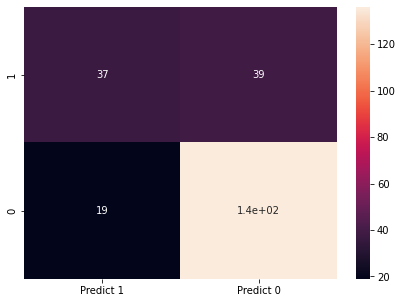

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = ["1","0"],columns = ["Predict 1","Predict 0"])
plt.figure(figsize = (7,5))
sb.heatmap(df_cm, annot=True)